In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import normalize,scale

In [2]:
def algo_test(x,y):
        
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [3]:
df = pd.read_csv("Amsterdam_House_Price.csv")
del df["Unnamed: 0"]
df

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
919,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [4]:
df = df [['Price','Area','Room','Lon','Lat']]
df['Price'] = df['Price'].astype(float)

In [5]:
abs(df.corr()["Price"].sort_values(ascending=False))

Price    1.000000
Area     0.835090
Room     0.623448
Lat      0.062196
Lon      0.013561
Name: Price, dtype: float64

In [6]:
df.isnull().sum()

Price    4
Area     0
Room     0
Lon      0
Lat      0
dtype: int64

In [7]:
df = df.dropna()

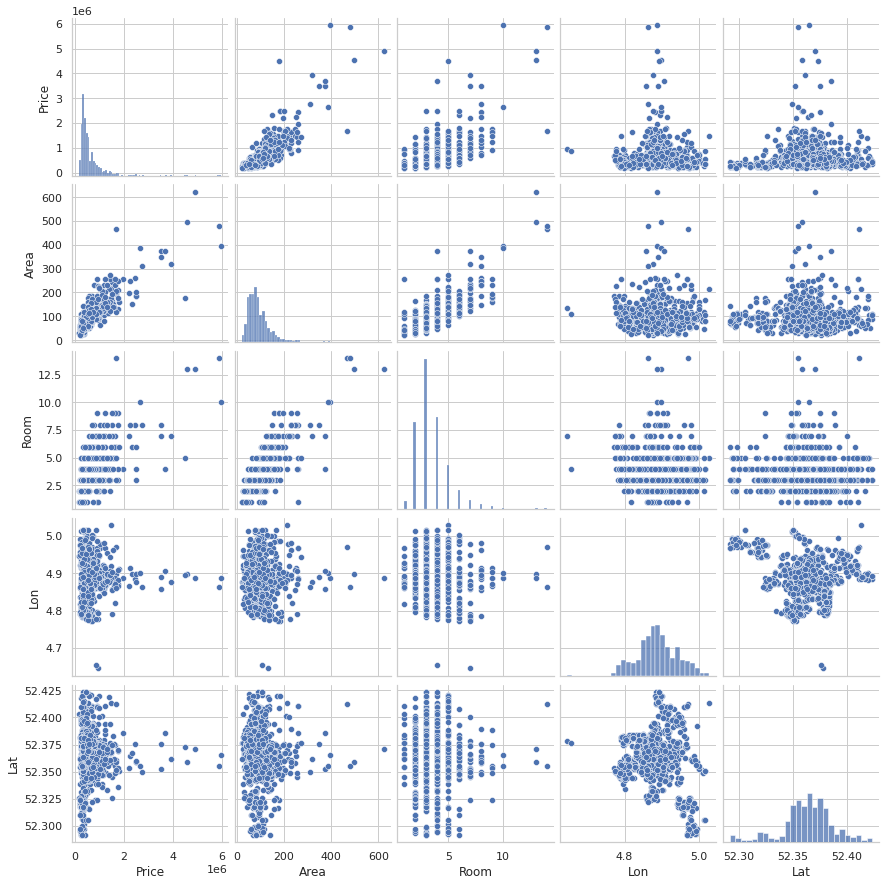

In [8]:
sns.pairplot(df)

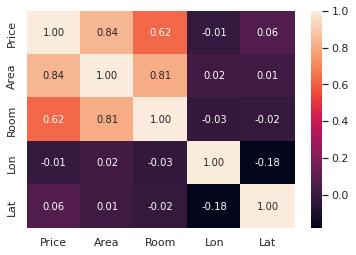

In [9]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [10]:
df.columns

Index(['Price', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 923
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   920 non-null    float64
 1   Area    920 non-null    int64  
 2   Room    920 non-null    int64  
 3   Lon     920 non-null    float64
 4   Lat     920 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 75.4 KB


In [12]:
X = df[['Area', 'Room', 'Lat','Lon']]
y = df[['Price']]

In [13]:
X.shape,y.shape

((920, 4), (920, 1))

In [14]:
algo_test(X,y)

[11:37:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,R_Squared,RMSE,MAE
Gradient Boosting,0.814405,237727.230487,110185.532918
Linear,0.799811,246897.195663,164755.885594
Lasso,0.799805,246900.456418,164760.955556
Ridge,0.797585,248265.841759,166323.142004
ElasticNet,0.789957,252900.700851,169314.761938
Extra Tree,0.780840,258330.637763,129984.385870
KNeighborsRegressor,0.756017,272568.424905,156566.358696
XGBRegressor,0.734804,284170.524707,124193.900221
Decision Tree,0.545159,372156.283476,146073.635870
